In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pylab as plt
from scipy.spatial.distance import pdist

In [2]:
npart, ndim = 3, 3
oms = np.ones(ndim)
g_param = 4.0
range_param = 0.1

In [8]:
def psi(al1, oms1, rs1):
    return np.exp(-al1*np.sum(oms1*rs1**2))

def ekin(al1, oms1, rs1, h=0.01):
    npart1, ndim1 = rs1.shape
    psiold = psi(al1, oms1, rs1)
    kin = 0
    for j1 in range(npart1):
        numer = 0.
        for el in range(ndim1):
            r = rs1[j1, el]
            rs1[j1, el] = r + h
            psip = psi(al1, oms1, rs1)
            rs1[j1, el] = r - h
            psim = psi(al1, oms1, rs1)
            rs1[j1, el] = r
            numer += psip + psim - 2.*psiold
        lapl = numer/h**2
        kin += -0.5*lapl/psiold
    return kin

def epot(oms1,rs1,g1,prange1):
    distances1 = pdist(rs1)
    return 0.5*np.sum(oms1**2*rs1**2)+np.sum(g1*np.exp(-(distances1/prange1)**2))

def vmc(al1, npart1, ndim1, oms1, g1, prange1, inseed=8735):
    Ncal, nm, th = 10**4, 100, 0.8
    np.random.seed(inseed)
    rolds = np.random.uniform(-1, 1, (npart1, ndim1))
    psiold = psi(al1, oms1, rolds)
    iacc = 0
    eners = 0.0
    eners_sq = 0.0 
    
    for itot in range(nm*Ncal):
        rnews = rolds + th*np.random.uniform(-1, 1, (npart1, ndim1))
        psinew = psi(al1, oms1, rnews)
        psiratio = (psinew/psiold)**2
        
        if psiratio >= np.random.uniform(0,1):
            rolds = np.copy(rnews)
            psiold = psinew
            iacc += 1
        if (itot%nm) == 0:
            energy_m = ekin(al1, oms1, rolds) + epot(oms1, rolds, g1, prange1)
            eners += energy_m/Ncal
            eners_sq += energy_m**2/Ncal
        
    val_dict={'A':iacc/(nm*Ncal),'E':eners,'Er':np.sqrt(eners_sq-eners**2)/np.sqrt(Ncal-1)}
    return val_dict

In [9]:
alphas_s = np.linspace(0.1, 1.0, 19)
E_s = np.zeros(alphas_s.shape[0], float)
E_err_s = np.zeros(alphas_s.shape[0], float)
for xi, xu in enumerate(alphas_s):
    dict_1 = vmc(xu, npart, ndim, oms, g_param, range_param)
    E_s[xi], E_err_s[xi] = dict_1['E'], dict_1['Er']
    print(dict_1["A"])

0.665993
0.597418
0.542402
0.496242
0.457113
0.421389
0.390725
0.363003
0.338352
0.315948
0.295272
0.27688
0.259425
0.24349
0.229153
0.215563
0.202861
0.191581
0.180385


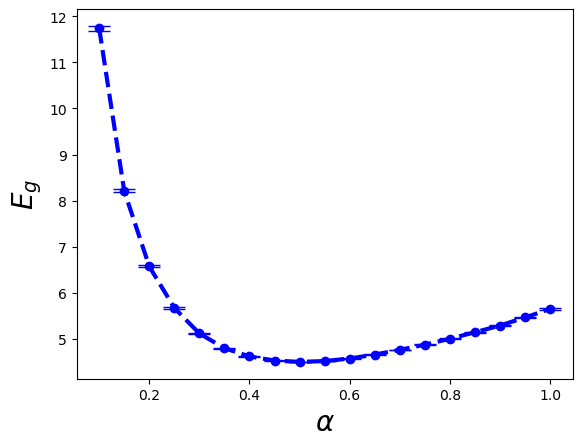

In [10]:
plt.errorbar(alphas_s, E_s, E_err_s, fmt='b--o', linewidth=3, capsize=8)
plt.xlabel('$\\alpha$', fontsize=20)
plt.ylabel('$E_{g}$', fontsize=20)
#plt.savefig('MC_1.pdf')
plt.show()

In [11]:
np.c_[alphas_s, E_s]

array([[ 0.1       , 11.74067303],
       [ 0.15      ,  8.21124456],
       [ 0.2       ,  6.57340792],
       [ 0.25      ,  5.67356829],
       [ 0.3       ,  5.11944553],
       [ 0.35      ,  4.79998304],
       [ 0.4       ,  4.62164073],
       [ 0.45      ,  4.53264218],
       [ 0.5       ,  4.50305313],
       [ 0.55      ,  4.52081365],
       [ 0.6       ,  4.57580204],
       [ 0.65      ,  4.66197226],
       [ 0.7       ,  4.76449237],
       [ 0.75      ,  4.87607187],
       [ 0.8       ,  5.00452208],
       [ 0.85      ,  5.14601504],
       [ 0.9       ,  5.29087078],
       [ 0.95      ,  5.46738679],
       [ 1.        ,  5.64967245]])